In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def soundex(word):
    # Define the Soundex dictionary for consonants
    soundex_dict = {
        'B': '1', 'F': '1', 'P': '1', 'V': '1',
        'C': '2', 'G': '2', 'J': '2', 'K': '2', 'Q': '2', 'S': '2', 'X': '2', 'Z': '2',
        'D': '3', 'T': '3',
        'L': '4',
        'M': '5', 'N': '5',
        'R': '6'
    }

    # Step 1: Retain the first letter
    soundex_code = word[0].upper()

    # Step 2: Change vowels to 0 and consonants to their codes
    for char in word[1:]:
        char = char.upper()
        if char in soundex_dict:
            soundex_code += soundex_dict[char]
        else:
            soundex_code += '0'

    # Step 3: Remove all consecutive identical digits
    soundex_code = soundex_code[0] + ''.join(
        soundex_code[i] for i in range(1, len(soundex_code)) if soundex_code[i] != soundex_code[i - 1])
    #
    # Step 4: Remove all zeros
    soundex_code = soundex_code.replace('0', '')
    # Step 5: Pad the result with trailing zeros and return the first 4 positions
    soundex_code = soundex_code.ljust(4, '0')[:4]

    return soundex_code

soundex = np.vectorize(soundex)


In [3]:
def to_upper(word):
    """Convert the word to uppercase."""
    return word.upper()

In [4]:
def union_words(word1, word2):
    """Perform union of unique characters from two words."""
    # Convert words to uppercase
    word1_upper = to_upper(word1)
    word2_upper = to_upper(word2)

    # Create sets of characters from each word
    set1 = set(word1_upper)
    set2 = set(word2_upper)

    # Perform union of the two sets
    union_set = set1.union(set2)

    # Convert the union set back to a sorted string for readability
    union_string = ''.join(sorted(union_set))

    return union_string

In [5]:
def intersection_words(word1, word2):
    """Perform intersection of unique characters from two words."""
    # Convert words to uppercase
    word1_upper = to_upper(word1)
    word2_upper = to_upper(word2)

    # Create sets of characters from each word
    set1 = set(word1_upper)
    set2 = set(word2_upper)

    # Perform intersection of the two sets
    intersection_set = set1.intersection(set2)

    # Convert the intersection set back to a sorted string for readability
    intersection_string = ''.join(sorted(intersection_set))

    return intersection_string

In [6]:
def jaccard_similarity(word1, word2):
    return len(intersection_words(word1, word2)) / len(union_words(word1, word2))

In [7]:
def match(word1, listt):
    maxx = -1
    for i in range(10):
        # soundex_list.append(soundex(i))
        if jaccard_similarity(word1, listt[i]) > maxx:
            maxx = jaccard_similarity(word1, listt[i])
            key = i
    return key

In [8]:
# Load the Excel file into a pandas DataFrame
df = pd.read_excel('TaskData.xlsx',header=None)  # Specify header=None to treat the first row as data, not column names

# Reading the first column (index 0)
column_data = df[0].tolist()
column_data = np.array(column_data)

In [9]:
profession_list = [
    "Doctor",
    "Lawyer",
    "Teacher",
    "Engineer",
    "Accountant",
    "Nurse",
    "Police",
    "Architect",
    "Dentist",
    "Pharmacist"
]

In [10]:
heck_list = np.array(profession_list)

check_list = soundex(profession_list)
check_list = np.array(check_list)
count_list = np.zeros(check_list.shape[0], dtype=int)

In [11]:
for i in column_data:
    ch = False
    for j in range(10):
        if soundex(i) == check_list[j]:
            count_list[j] += 1
            ch = True
    if not ch:
        count_list[match(i, profession_list)] += 1

In [12]:
df = pd.DataFrame({
    'Profession': profession_list,
    'Count': count_list
})
print(df)

   Profession  Count
0      Doctor    225
1      Lawyer     82
2     Teacher    195
3    Engineer    328
4  Accountant     32
5       Nurse     85
6      Police    162
7   Architect     63
8     Dentist    192
9  Pharmacist     42


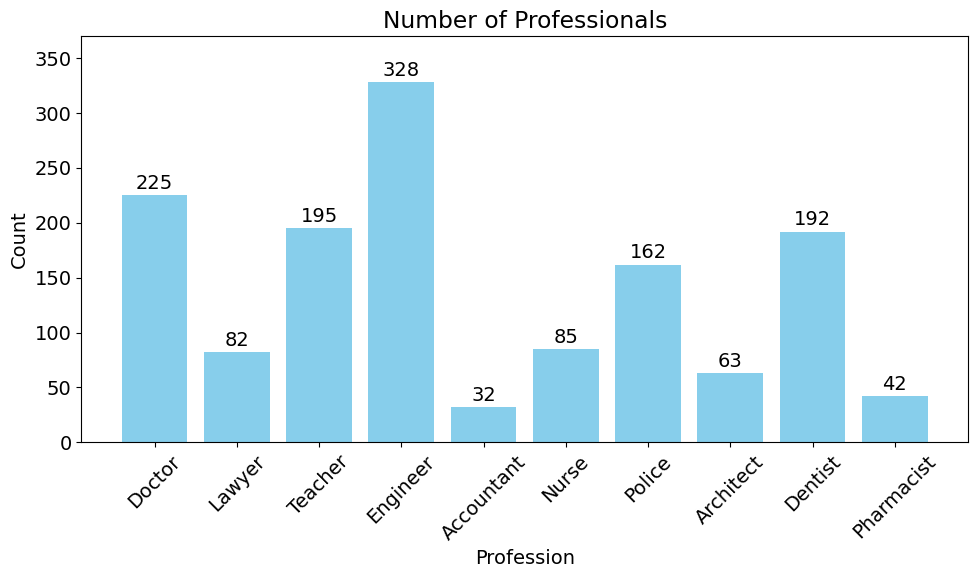

In [13]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 14})
bars = plt.bar(df['Profession'], df['Count'], color='skyblue')
# Adding the numbers on top of the bars
for bar in bars:
    yheight = bar.get_height()
    xwidth = bar.get_width()
    plt.text(bar.get_x() + bar.get_width() / 2, yheight + 2, yheight, ha='center', va='bottom')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.title('Number of Professionals')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to fit the labels
plt.ylim(0, 370)  # for visibility reasons
plt.show()